In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, ScalarFormatter
from matplotlib.patches import Rectangle

In [76]:
def month_change(date):
    dict_m = {'янв': 'Jan','фев': 'Feb','март': 'Mar','апр': 'Apr','май': 'May','июнь': 'Jun','июль': 'Jul','авг': 'Aug', 'сен': 'Sep', 'окт': 'Oct', 'ноя': 'Nov', 'дек': 'Dec'}
    for month in date.split(' '):
        for j in dict_m.keys():
            if month == j:
                month = dict_m[j]
                res = ' '.join([date.split(' ')[0], month, date.split(' ')[2]])
            else:
                month = month
    return res

In [77]:
def month_dig_change(date):
    dict_m = {'1': '01','2': '02','3': '03','4': '04','5': '05','6': '06','7': '07','8': '08', '9': '09', '10': '10', '11': '11', '12': '12'}
    res = []
    for month in date.split('.')[0]:
        for j in dict_m.keys():
            if month == j:
                res = '.'.join([dict_m[j], date.split('.')[1]])
    return res

In [78]:
def year_dig_change(date):
    dict_m = {'202': '2020', '201': '2010'}
    res = []
    for year in date.split('.'):
        for j in dict_m.keys():

            if year == j:
                res = '.'.join([date.split('.')[0], dict_m[j]])
                break
            else:
                res = '.'.join([date.split('.')[0], date.split('.')[1]])

    return res

## Data Upload

In [132]:
%%time
from pathlib import Path
path = os.getcwd()
files = Path(path).glob('*.xls')
dfs = list()
for f in files:
    data = pd.read_excel(f, header = 2)
    wellName = str((f.stem)).split('.')[1]
    wellName = (wellName.split('(')[0]).strip()
    data['well'] = wellName
    dfs.append(data)

shmt_init = pd.concat(dfs, ignore_index=True)
shmt_init.head()

Wall time: 1.06 s


,Unnamed: 0,Тип,Нсп,ТМ,Дисп,OIS,Qж_мас ТМ,Qж,Qж ТМ,Qж ТМ (исх),Обв ХАЛ,Обв,Qн,Qн ТМ,Pзаб(PпрTM),Pзаб (иссл.),Pпл кр.,well
0,30 ноя 2022,ВНН5-80-2800,3044 м,Запуск,NaN,раб.,NaN,33.70,NaN,NaN,NaN,34.73,18.763,NaN,NaN,0.0,NaN,2619
1,29 ноя 2022,ВНН5-80-2800,3044 м,Запуск,NaN,раб.,NaN,33.70,NaN,NaN,NaN,34.73,18.763,NaN,NaN,0.0,NaN,2619
2,28 ноя 2022,ВНН5-80-2800,3044 м,Запуск,NaN,раб.,NaN,34.20,NaN,NaN,NaN,34.73,19.041,NaN,NaN,0.0,NaN,2619
3,27 ноя 2022,ВНН5-80-2800,3044 м,Запуск,NaN,раб.,NaN,33.42,NaN,NaN,NaN,34.73,18.607,NaN,NaN,0.0,NaN,2619
4,26 ноя 2022,ВНН5-80-2800,3044 м,Запуск,NaN,раб.,NaN,35.00,NaN,NaN,NaN,34.73,19.486,NaN,NaN,0.0,NaN,2619


In [133]:
shmt_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41850 entries, 0 to 41849
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    41850 non-null  object 
 1   Тип           10848 non-null  object 
 2   Нсп           10848 non-null  object 
 3   ТМ            41850 non-null  object 
 4   Дисп          4822 non-null   object 
 5   OIS           17981 non-null  object 
 6   Qж_мас ТМ     0 non-null      float64
 7   Qж            16129 non-null  float64
 8   Qж ТМ         0 non-null      float64
 9   Qж ТМ (исх)   0 non-null      float64
 10  Обв ХАЛ       0 non-null      float64
 11  Обв           15838 non-null  float64
 12  Qн            16134 non-null  float64
 13  Qн ТМ         0 non-null      float64
 14  Pзаб(PпрTM)   0 non-null      float64
 15  Pзаб (иссл.)  15649 non-null  float64
 16  Pпл кр.       0 non-null      float64
 17  well          41850 non-null  object 
dtypes: float64(11), object(7)


In [268]:
%%time
shmt_init.rename(columns = 
            {'Unnamed: 0':'date',
            'Тип':'pump_type',
            'Нсп':'depth_pump',
            'ТМ':'tm',
            'Дисп':'disp',
            'OIS':'ois',
            'Qж_мас ТМ':'q_liqm_tm',
            'Qж':'q_liq',
            'Qж ТМ':'q_liq_tm',
            'Qж ТМ (исх)':'q_liq_tm_init',
            'Обв ХАЛ':'wc_chem',
            'Обв':'wc',
            'Qн':'q_oil',
            'Qн ТМ':'q_oil_tm',
            'Pзаб(PпрTM)':'bhp_tm',
            'Pзаб (иссл.)':'bhp_rsch',
            'Pпл кр.':'res_press'}, inplace=True)
shmt = shmt_init[['well', 'date', 'q_liq', 'q_oil', 'wc', 'wc_chem', 'bhp_rsch', 'pump_type']]
shmt['well'] = shmt['well'].astype("string")
shmt['date'] = shmt['date'].astype("string")
shmt['date'] = shmt['date'].apply(lambda x: month_change(x))
shmt['date'] = pd.to_datetime(shmt['date'])

<timed exec>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Wall time: 2.94 s


<timed exec>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [269]:
shmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41850 entries, 0 to 41849
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   well       41850 non-null  string        
 1   date       41850 non-null  datetime64[ns]
 2   q_liq      16129 non-null  float64       
 3   q_oil      16134 non-null  float64       
 4   wc         15838 non-null  float64       
 5   wc_chem    0 non-null      float64       
 6   bhp_rsch   15649 non-null  float64       
 7   pump_type  10848 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1), string(1)
memory usage: 2.6+ MB


In [1]:
# ngt_init = pd.read_csv('ngt6001.csv', sep=';')
# ngt_init[:-1]
# ngt_init.rename(columns = 
#             {'Скважина':'well',
#             'Дата':'date',
#             'Причина простоя':'comment',
#             'Время работы, ч':'work_time_hr',
#             'Нефть, т':'oil_t',
#             'Qв, т/сут':'wat_t',
#             'Обводненность (масса), %':'wc_tpd',
#             }, inplace=True)
# ngt = ngt_init[['well', 'date', 'work_time_hr', 'oil_t', 'wat_t', 'wc_tpd']][:-1]
# ngt['oil_t'] = ngt['oil_t'].astype("float64")
# ngt['date'] = ngt['date'].astype("string")
# ngt['date'] = ngt['date'].apply(lambda x: month_dig_change(x))
# ngt['date'] = ngt['date'].apply(lambda x: year_dig_change(x))
# ngt['date'] = pd.to_datetime(ngt['date'], format = '%d.%Y')
# ngt.info()

## Data Processing

In [3]:
# ngt['oil_tpd'] = (ngt.oil_t/ngt.work_time_hr)*24
# ngt.head()

## Final Result

In [136]:
shmt.well.unique()

<StringArray>
['2619', '2620', '2737', '2738', '2740']
Length: 5, dtype: string

In [204]:
shmt_clean_6m

,well,date,q_liq,q_oil,wc,bhp_rsch,pump_type
10113,2620,2018-02-21,62.0,30.833,41.70,0.0,ЭЦН-160-2950
10114,2620,2018-02-20,62.0,30.833,41.70,0.0,ЭЦН-160-2950
10115,2620,2018-02-19,62.0,30.833,41.70,0.0,ЭЦН-160-2950
10116,2620,2018-02-18,62.0,29.881,43.50,0.0,ЭЦН-160-2950
10117,2620,2018-02-17,62.0,29.881,43.50,0.0,ЭЦН-160-2950
...,...,...,...,...,...,...,...
10288,2620,2017-08-30,148.0,37.873,70.00,NaN,ЭЦН-160-2950
10289,2620,2017-08-29,152.0,37.730,70.90,NaN,ЭЦН-160-2950
10290,2620,2017-08-28,153.0,36.412,72.10,NaN,ЭЦН-160-2950
10291,2620,2017-08-27,150.0,30.000,76.55,NaN,ЭЦН-160-2950


In [236]:
wellQuantity = shmt.well.unique()

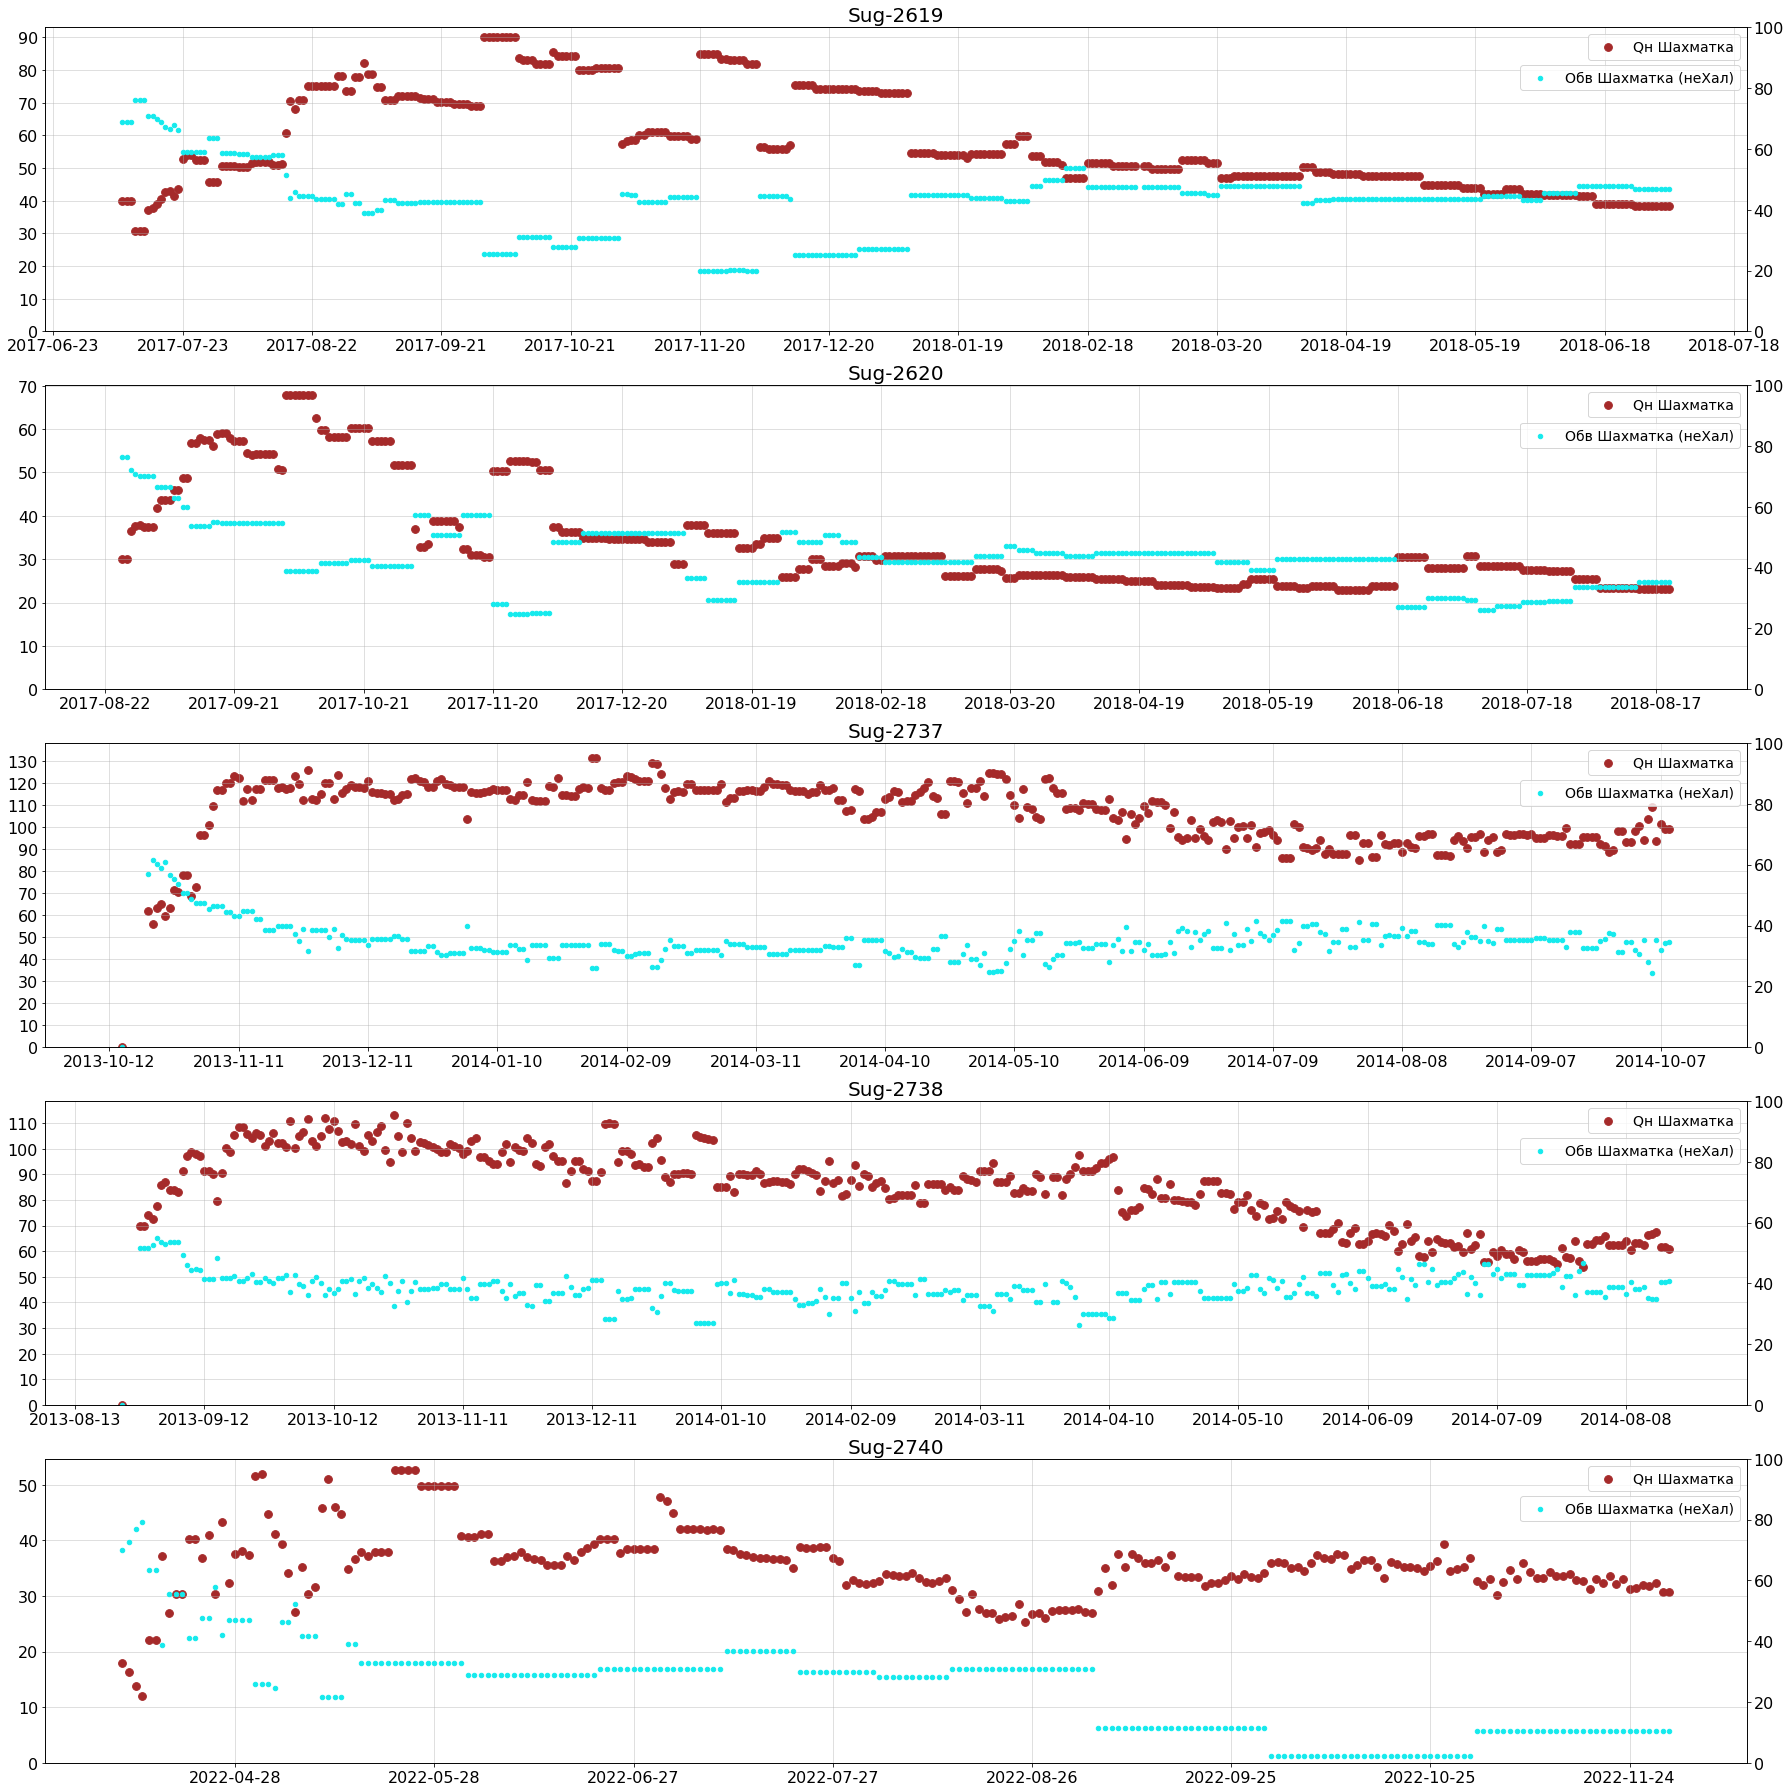

In [327]:
period = 360
height = 5*len(wellQuantity)
f, ax = plt.subplots(len(wellQuantity), 1, figsize=(25,height))
for num, well in enumerate(wellQuantity):
    shmt_clean = shmt.query(f'well == "{well}"')
    shmt_clean = shmt_clean.dropna(subset = ['pump_type'])
    well_title = 'Sug-' + shmt_clean.well.iloc[0]
    shmt_clean_6m = shmt_clean.iloc[period*(-1):]
    
    ax[num].set_title(well_title, fontsize=20)
    ax[num].tick_params(axis='both', which='major', labelsize=16)
    ax[num].scatter(shmt_clean_6m.date, shmt_clean_6m.q_oil, color = '#a52a2a', s=60, label = 'Qн Шахматка')
#     ax[num].scatter(shmt_clean_6m.date, shmt_clean_6m.q_liq, color = '#12c97d')
    ax[num].yaxis.set_major_locator(MultipleLocator(10))
    ax[num].legend(loc='best', bbox_to_anchor=(1, 1), fontsize=14)
    ax[num].set_ylim(0)
    ax[num].grid(alpha=0.5)
    ax[num] = ax[num].twinx()
    ax[num].tick_params(axis='both', which='major', labelsize=16)
    ax[num].scatter(shmt_clean_6m.date, shmt_clean_6m.wc, color = '#15eaed',s=20, label = 'Обв Шахматка (неХал)')
    ax[num].set_ylim(0,100)
    ax[num].xaxis.set_major_locator(MultipleLocator(30));
    ax[num].legend(loc='best', bbox_to_anchor=(1, 0.9), fontsize=14)
    # ax[0].step(ngt.date, ngt.oil_tpd, color = 'black', linewidth=3)
plt.tight_layout()
plt.savefig('Sug_pad59.pdf')